In [1]:
# load graph object from file
import pickle 
import os
import numpy as np 
G = pickle.load(open('G_politicans_final.pickle', 'rb'))

In [25]:
# Extract sentiment values from the graph nodes
sentiments = np.array([data['sentiment'] for _, data in G.nodes(data=True)])

# Calculate statistics
average_sentiment = np.mean(sentiments)
median_sentiment = np.median(sentiments)
variance_sentiment = np.var(sentiments)
percentile_25 = np.percentile(sentiments, 25)
percentile_75 = np.percentile(sentiments, 75)

print(f"Average Sentiment: {average_sentiment}")
print(f"Median Sentiment: {median_sentiment}")
print(f"Variance of Sentiment: {variance_sentiment}")
print(f"25th Percentile of Sentiment: {percentile_25}")
print(f"75th Percentile of Sentiment: {percentile_75}")

Average Sentiment: 5.4832086502565245
Median Sentiment: 5.479619047619047
Variance of Sentiment: 0.009807314962835429
25th Percentile of Sentiment: 5.413865384615379
75th Percentile of Sentiment: 5.548718354430373


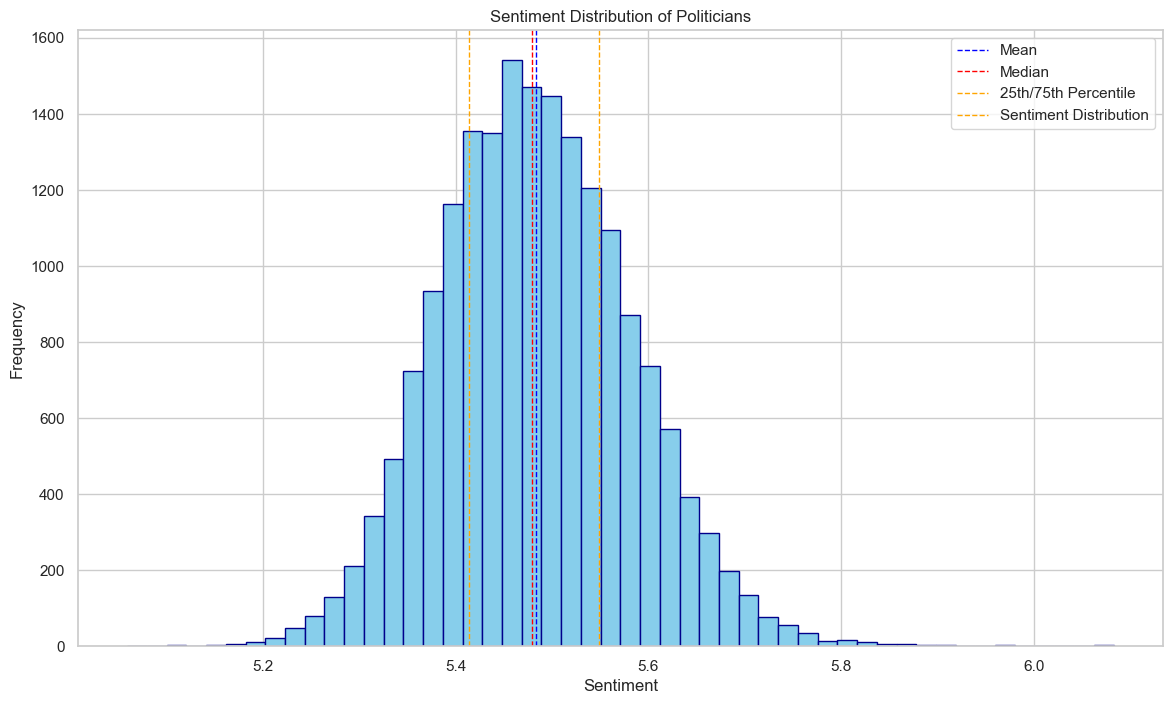

In [26]:
import matplotlib.pyplot as plt

hist = np.histogram(sentiments, bins=50)
plt.figure(figsize=(14, 8))
plt.bar(hist[1][:-1], hist[0], width=np.diff(hist[1]), align='edge', edgecolor='darkblue', color='skyblue')
plt.axvline(average_sentiment, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(median_sentiment, color='red', linestyle='dashed', linewidth=1)
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(percentile_75, color='orange', linestyle='dashed', linewidth=1)
plt.legend(['Mean', 'Median', '25th/75th Percentile', 'Sentiment Distribution'])
plt.title('Sentiment Distribution of Politicians')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [27]:
import networkx as nx

# Sort the nodes by sentiment
node_sentiment = nx.get_node_attributes(G, 'sentiment')
sorted_sentiments = sorted(node_sentiment.items(), key=lambda x: x[1], reverse=True)

print("Top 10 happiest nodes:")
for person, sentiment in sorted_sentiments[:10]:
    party = G.nodes[person].get('party', 'Unknown')
    print(f"{person}: {sentiment} valence, Party: {party}")
print()
print("Top 10 saddest nodes:")
for person, sentiment in sorted_sentiments[-10:]:
    party = G.nodes[person].get('party', 'Unknown')
    print(f"{person}: {sentiment} valence, Party: {party}")

Top 10 happiest nodes:
Kenneth_R._Plum: 6.082367149758441 valence, Party: Democratic
Dennis_Cohoon: 6.0686244541484395 valence, Party: Democratic
Sandra_Major: 5.98601156069363 valence, Party: Republican
Steven_Thayn: 5.971846153846147 valence, Party: Republican
Joe_Plouff: 5.961718750000001 valence, Party: Democratic
Evan_Worrell: 5.921858407079655 valence, Party: Republican
Cory_Mason: 5.91568345323743 valence, Party: Democratic
Melissa_Lackey_Oremus: 5.913991416309021 valence, Party: Republican
Truman_Chafin: 5.887254237288123 valence, Party: Democratic
Dale_Kildee: 5.877904148783953 valence, Party: Democratic

Top 10 saddest nodes:
Lance_Mason: 5.173307888040709 valence, Party: Democratic
David_Nangle: 5.167085714285713 valence, Party: Democratic
Hugh_S._Jenkins: 5.166455696202535 valence, Party: Republican
Irwin_Schiff: 5.1565799842395235 valence, Party: Libertarian
John_Kivela: 5.147699115044249 valence, Party: Democratic
Hank_Coe: 5.13628318584071 valence, Party: Republican
Aaro

C:\Users\Mathilde\AppData\Local\Temp\ipykernel_30036\1510841602.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Party', y='Sentiment', data=df, palette="Set3")


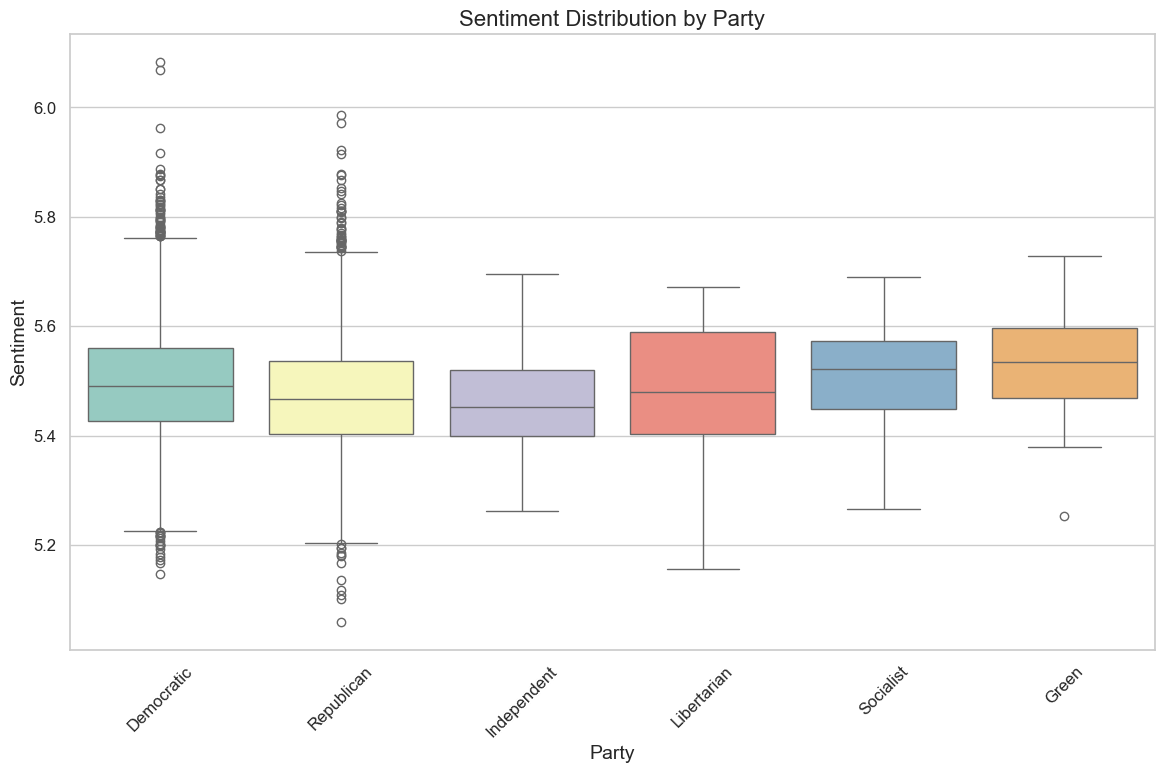

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract sentiment and party information from the graph nodes
node_data = [(data['sentiment'], data.get('party', 'Unknown')) for _, data in G.nodes(data=True) if 'sentiment' in data]

# Create a DataFrame for easier plotting
df = pd.DataFrame(node_data, columns=['Sentiment', 'Party'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 8))
sns.boxplot(x='Party', y='Sentiment', data=df, palette="Set3")
plt.title('Sentiment Distribution by Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()